Implementation Task1

We implement the 1D example of least square problem for the IGD

In [72]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].

def generate_random_numbers(n, mu, sigma, dist="normal"):
    # write your code here.
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        return np.random.uniform(mu - sigma/np.sqrt(3),mu + sigma/np.sqrt(3),n)
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        
        
# test your code:
y_test = generate_random_numbers(5, 0, 0.1, "normal")
y_test

array([-0.04616461,  0.05377989,  0.05158788, -0.08815205,  0.18013352])

In [73]:
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")

In [74]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task1(y): # repeat
    x = 0
    n = len(y)
    ordering = np.random.choice(n, n, replace=True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    f = np.empty(n) # empty array for histories 
    X = np.empty(n) # empty array for xk
    for k in range(n):
        gamma = 1/(k+1)
        x = x - gamma*(x - y[ordering[k]])
        f[k] = 0.5*np.sum((x - y)**2)
        X[k] = x
    return x, f, X
        
# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task1(y): # no repeat
    x = 0
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    f = np.empty(n)
    X = np.empty(n)
    for k in range(n):
        gamma = 1/(k+1)
        x = x - gamma*(x - y[ordering[k]])
        f[k] = 0.5*np.sum((x - y)**2)
        X[k] = x
    return x, f, X

Final x using placement: 0.2663730095558731
Final x without using placement: 0.28426350883742385


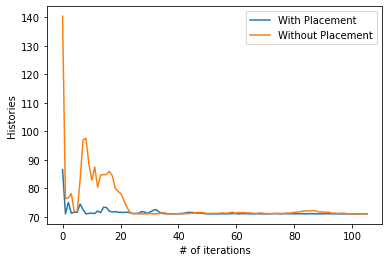

In [75]:
# Using y1
x_wr, wr_solu, X1 = IGD_wr_task1(y1)
print("Final x using placement:", x_wr)
x_wo, wo_solu, X2 = IGD_wo_task1(y1)
print("Final x without using placement:", x_wo)

X = np.linspace(0,105,105)
plt.plot(X,wr_solu)
plt.plot(X,wo_solu)
plt.legend(["With Placement","Without Placement"])
plt.xlabel("# of iterations")
plt.ylabel("Histories")
plt.show()

In [76]:
# Average of x with placement
print(np.sum(X1[:5])/5) # first 5
print(np.sum(X1[5:10])/5) # next 5
print(np.sum(X1[10:15])/5) # next 5
print()
# Average of x without placement
print(np.sum(X2[:5])/5)
print(np.sum(X2[5:10])/5)
print(np.sum(X2[10:15])/5)

0.13137918660272563
0.26167266891993646
0.17112348060655022

0.7410972866071879
0.8046691880007153
0.7799250842602097


Final x using placement: 0.5463006350584854
Final x without using placement: 0.504752965604123


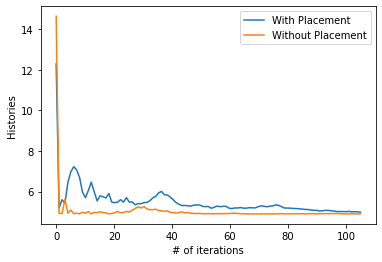

In [77]:
# Using y2
x_wr, wr_solu, X1 = IGD_wr_task1(y2)
print("Final x using placement:", x_wr)
x_wo, wo_solu, X2 = IGD_wo_task1(y2)
print("Final x without using placement:", x_wo)

X = np.linspace(0,105,105)
plt.plot(X,wr_solu)
plt.plot(X,wo_solu)
plt.legend(["With Placement","Without Placement"])
plt.xlabel("# of iterations")
plt.ylabel("Histories")
plt.show()

We calculate average of x with replacement and x without replacement to see more clear

In [79]:
# Average of x with placement
print(np.sum(X1[:5])/5) # first 5
print(np.sum(X1[5:10])/5) # next 5
print(np.sum(X1[10:15])/5) # next 5
print()
# Average of x without placement
print(np.sum(X2[:5])/5)
print(np.sum(X2[5:10])/5)
print(np.sum(X2[10:15])/5)
print(np.sum(X2[70:75])/5) #average of x70 to x75

0.4922610558902911
0.6927994277891283
0.6444977495143807

0.5538058747181607
0.5010424728146283
0.5053951601723541
0.4986285911006706


Ordering without replacement is better because it is more steady, and we can conclude that xk will converge to 0.5 and the xk+1 will converge to 0.5 as well

Implementation task2

In [80]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task2(y, beta):
    x = 0
    n = len(beta)
    ordering = np.random.choice(n, n, replace=True)
    f = np.empty(n)
    gamma = 0.05*np.amin(1/beta)
    for k in range(n):
        x = x - gamma*beta[ordering[k]]*(x - y)
        f[k] = 0.5*np.sum(beta*(x - y)**2)
    return x, f

# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task2(y, beta):
    x = 0
    n = len(beta)
    ordering = np.random.choice(n, n, replace=False)
    f = np.empty(n)
    gamma = 0.05*np.amin(1/beta)
    for k in range(n):
        x = x - gamma*beta[ordering[k]]*(x - y)
        f[k] = 0.5*np.sum(beta*(x - y)**2)
    return x, f

Final x using placement: 1.342759236314443
Final x without using placement: 1.330831634316972


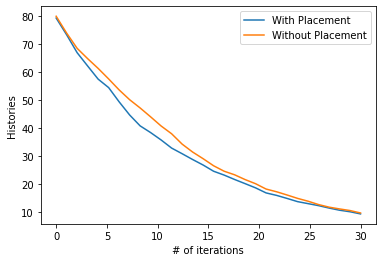

In [81]:
N = 30
beta = np.random.uniform(1,2,N)
y = 2
x_wr, wr_solu = IGD_wr_task2(y, beta)
print("Final x using placement:", x_wr)
x_wo, wo_solu = IGD_wr_task2(y, beta)
print("Final x without using placement:", x_wo)

X = np.linspace(0,N,N)
plt.plot(X,wr_solu)
plt.plot(X,wo_solu)
plt.legend(["With Placement","Without Placement"])
plt.xlabel("# of iterations")
plt.ylabel("Histories")
plt.show()

Final x using placement: 1.8986687835469165
Final x without using placement: 1.905963291134642


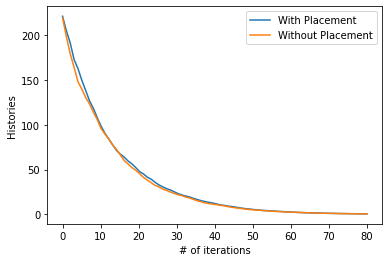

In [83]:
N = 80
beta = np.random.uniform(1,2,N)
y = 2
x_wr, wr_solu = IGD_wr_task2(y, beta)
print("Final x using placement:", x_wr)
x_wo, wo_solu = IGD_wr_task2(y, beta)
print("Final x without using placement:", x_wo)

X = np.linspace(0,N,N)
plt.plot(X,wr_solu)
plt.plot(X,wo_solu)
plt.legend(["With Placement","Without Placement"])
plt.xlabel("# of iterations")
plt.ylabel("Histories")
plt.show()

After big iterations, both of the methods can approach to the final results. However, without replacement works better since it approaches faster to the result.

Implementation task3

In [85]:
# generation of exact solution and data y and matrix A.

def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = A@x + w
    return A, x, y

In [86]:
A, xstar, y = generate_problem_task3(200, 100, 0.01)

In [87]:
# In these two functions, we could only focus on the first n steps and try to make comparisons on these data only.
# In practice, it requires more iterations to converge, due to the matrix might not be easy to deal with.
# You can put the ordering loop into a naive loop: namely, we simply perform the IGD code several rounds.
#
#
#
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task3(y, A, xstar):
    n = A.shape[1]
    m = A.shape[0]
    x = np.zeros(n)
    f = np.empty(n)
    conv = np.empty(n)
    gamma = 1e-3
    for i in range(3): # performing IGD for three rounds
        ordering = np.random.choice(n, n, replace=True)
        for k in range(n):
            x = x - gamma*A[ordering[k]]*(A[ordering[k]]@x - y[ordering[k]])
            f[k] = np.sum((A[k]@x - y[k])**2)
            conv[k] = LA.norm(x - xstar)
    return x, f, conv 

# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task3(y, A, xstar):
    n = A.shape[1]
    x = np.zeros(n)
    f = np.empty(n)
    conv = np.empty(n)
    gamma = 1e-3
    for i in range(3): # performing IGD for three rounds
        ordering = np.random.choice(n, n, replace=False)
        for k in range(n):
            x = x - gamma*A[ordering[k]]*(A[ordering[k]]@x - y[ordering[k]])
            f[k] = np.sum((A[k]@x - y[k])**2)
            conv[k] = LA.norm(x - xstar)
    return x, f, conv

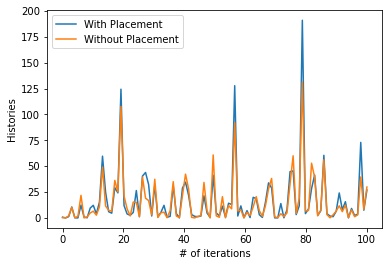

In [91]:
N = A.shape[1]
x_wr, wr_solu, wr_conv = IGD_wr_task3(y, A, xstar)
x_wo, wo_solu, wo_conv = IGD_wo_task3(y, A, xstar)

X = np.linspace(0,N,N)
plt.plot(X,wr_solu)
plt.plot(X,wo_solu)
plt.legend(["With Placement","Without Placement"])
plt.xlabel("# of iterations")
plt.ylabel("Histories")
plt.show()

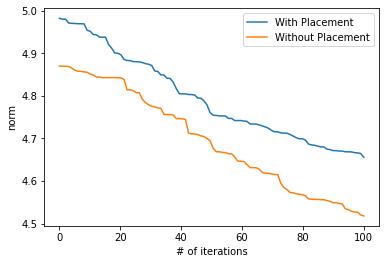

In [92]:
# Histories of norm(xk - xstar) 
X = np.linspace(0,N,N)
plt.plot(X,wr_conv)
plt.plot(X,wo_conv)
plt.legend(["With Placement","Without Placement"])
plt.xlabel("# of iterations")
plt.ylabel("norm")
plt.show()

Ordering without placement is still better because it beneaths the plot of with placement, which means the second method converges faster to the true solution than the first one.